In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr 
wr.filterwarnings('ignore') 
ev_data =pd.read_csv(r"C:\Users\vmali\OneDrive\Desktop\Electric_Vehicle_Population_Data.csv")
print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [10]:
ev_data=ev_data.dropna()

In [8]:
ev_data.shape

(177473, 17)

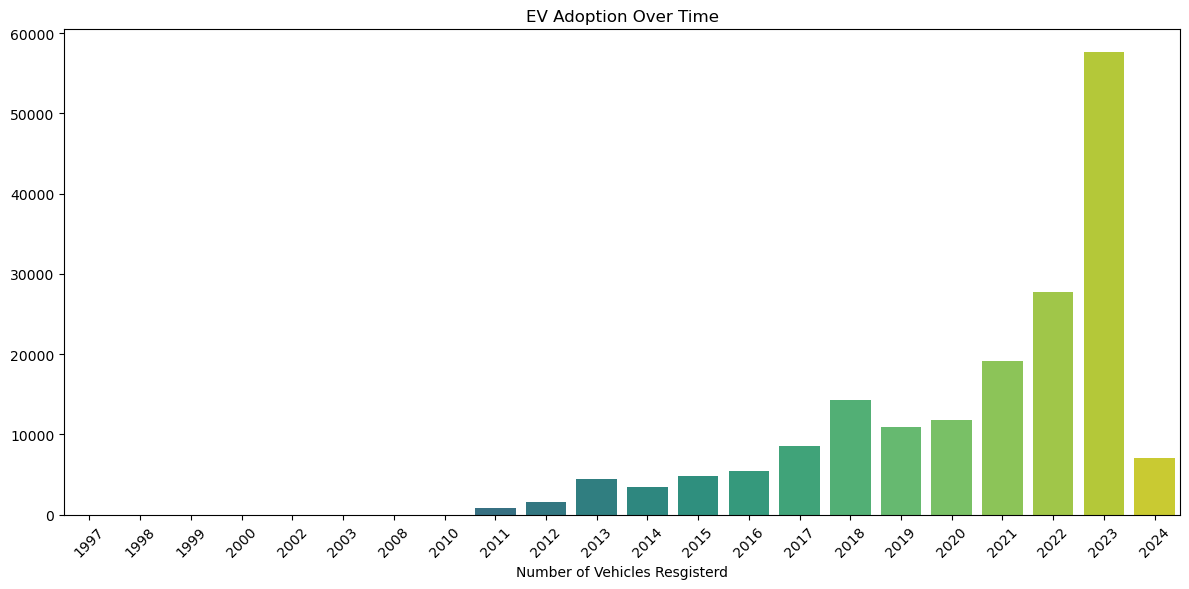

In [17]:
#ev Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Number of Vehicles Resgisterd')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#geographical distribution at county leval
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_cities=ev_city_distribution_top_counties.head(10)
top_cities

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


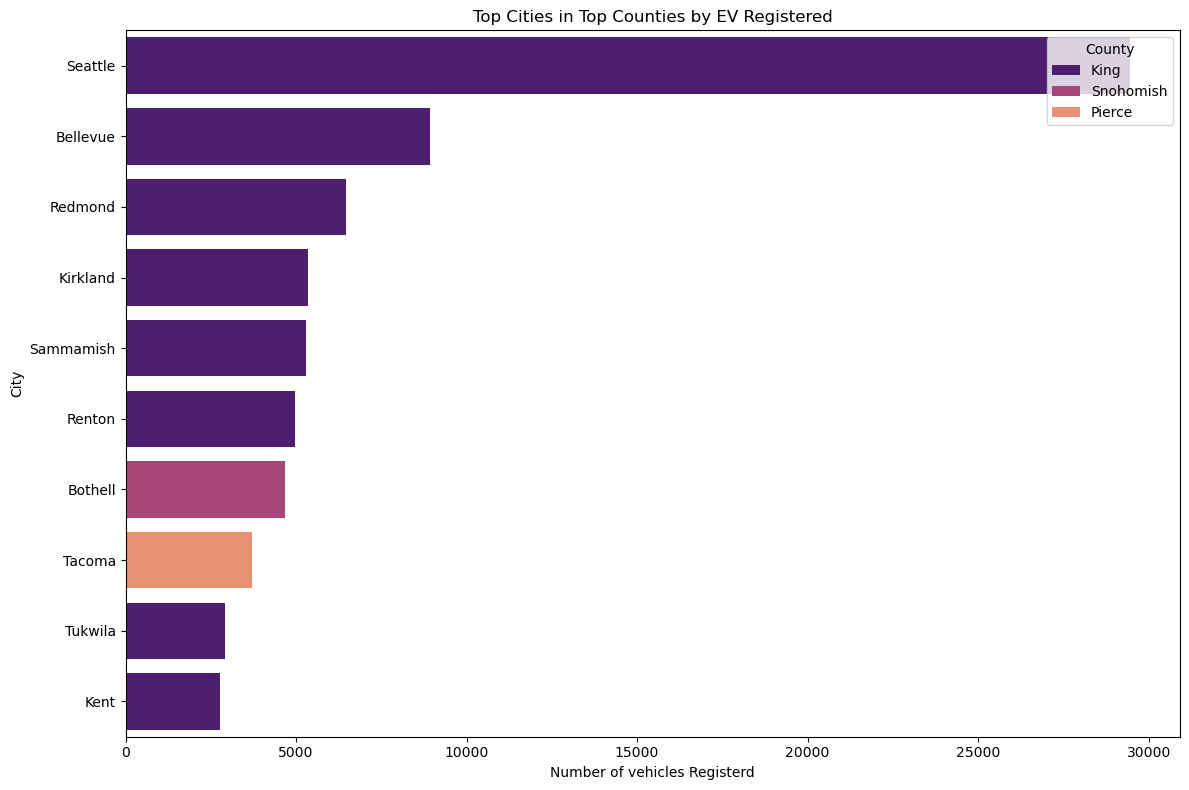

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',hue='County',data=top_cities,palette="magma")
plt.title('Top Cities in Top Counties by EV Registered')
plt.xlabel('Number of vehicles Registerd')
plt.ylabel('City')
plt.legend(title='County',loc='upper right')
plt.tight_layout()
plt.show()

In [37]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64

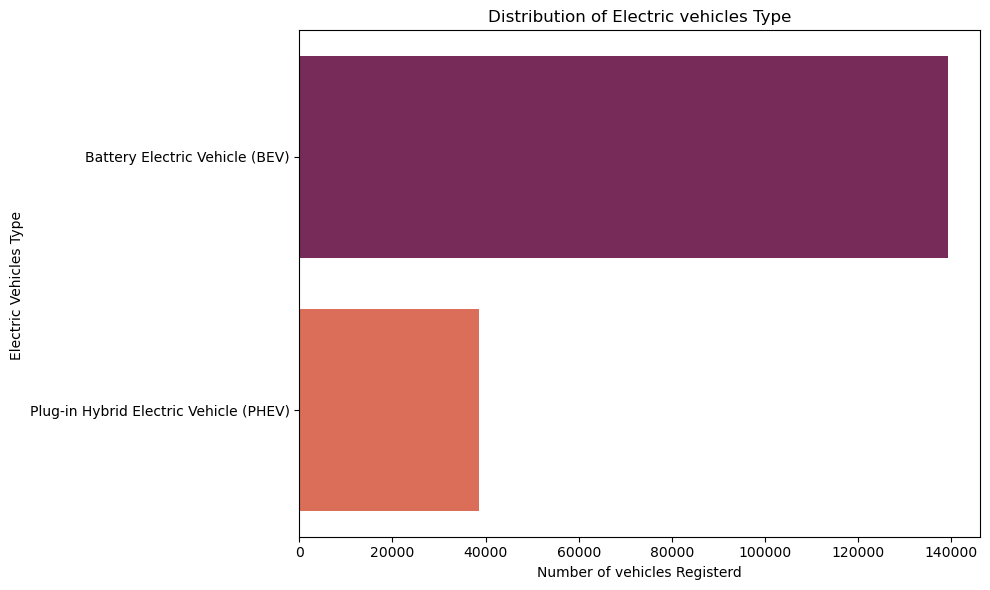

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')
plt.title('Distribution of Electric vehicles Type')
plt.xlabel('Number of vehicles Registerd')
plt.ylabel('Electric Vehicles Type ')
plt.tight_layout()
plt.show()

In [39]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)
ev_make_distribution

Make
TESLA         79659
NISSAN        13998
CHEVROLET     13678
FORD           9199
BMW            7570
KIA            7432
TOYOTA         6288
VOLKSWAGEN     5004
JEEP           4480
HYUNDAI        4406
Name: count, dtype: int64

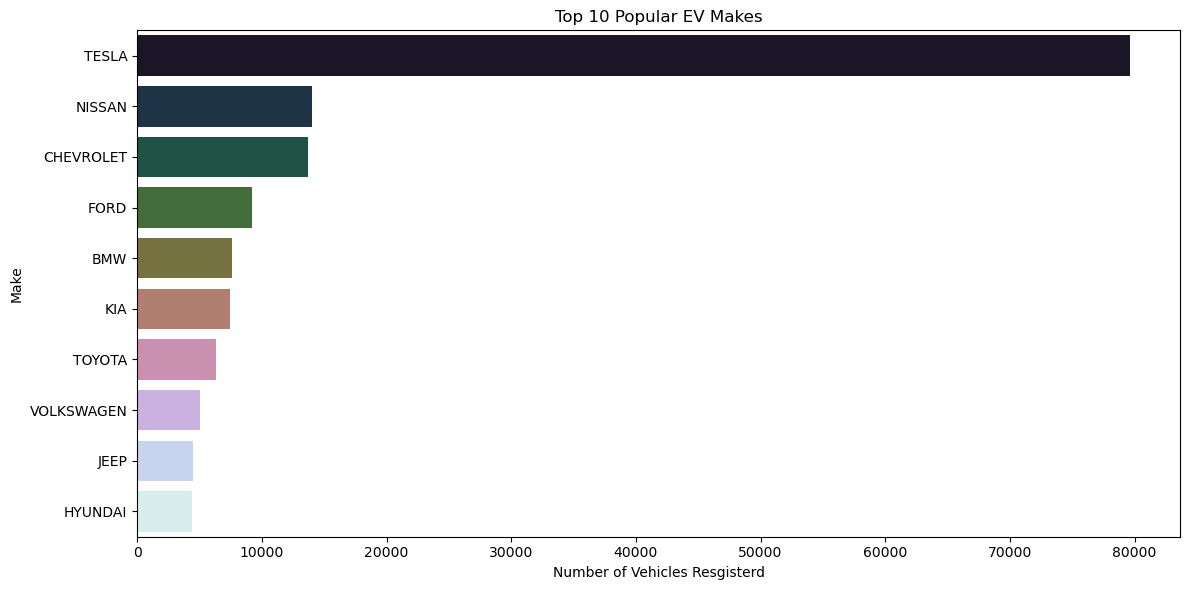

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette="cubehelix")
plt.title("Top 10 Popular EV Makes")
plt.xlabel('Number of Vehicles Resgisterd')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [51]:
top_3_makes=ev_make_distribution.head(3).index
top_makes_data=ev_data[ev_data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes=top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of vehicles')
top_models=ev_model_distribution_top_makes.head(10)
top_models

,Make,Model,Number of vehicles
0,TESLA,MODEL Y,35989
1,TESLA,MODEL 3,30092
2,NISSAN,LEAF,13366
3,TESLA,MODEL S,7735
4,CHEVROLET,BOLT EV,6821
5,TESLA,MODEL X,5796
6,CHEVROLET,VOLT,4796
7,CHEVROLET,BOLT EUV,1772
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,241


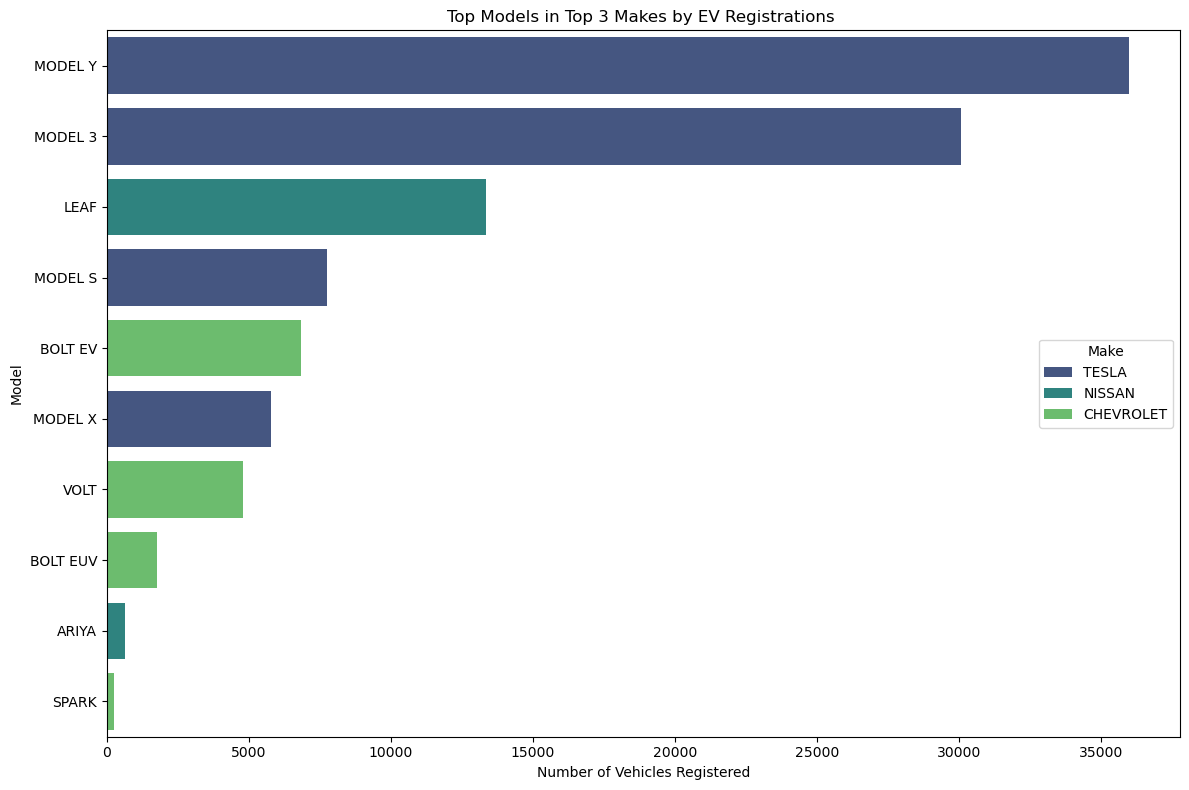

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of vehicles',y='Model',hue='Make',data=top_models,palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations ')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

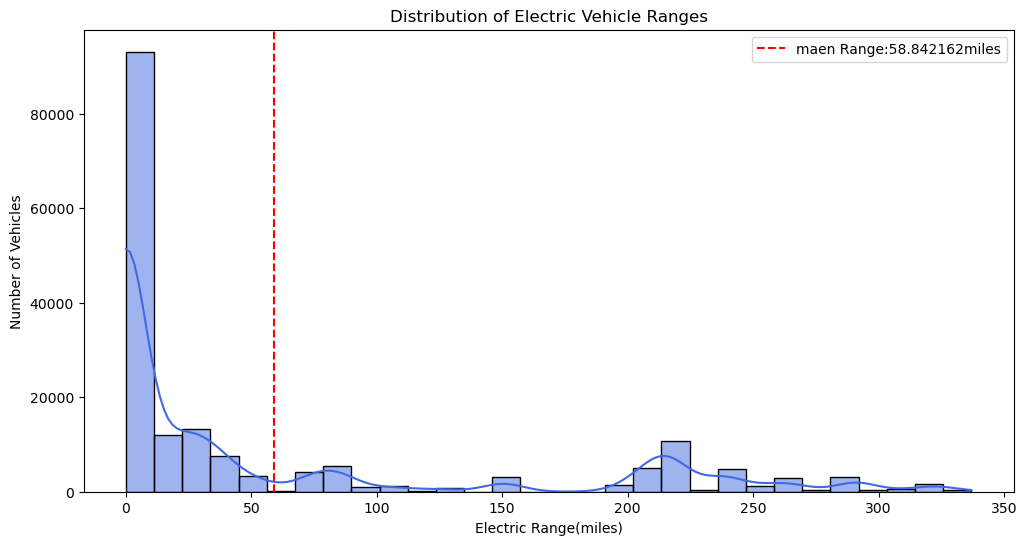

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range(miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(),color='red',linestyle='--',label=f'maen Range:{ev_data["Electric Range"].mean():2f}miles')
plt.legend()
plt.show()

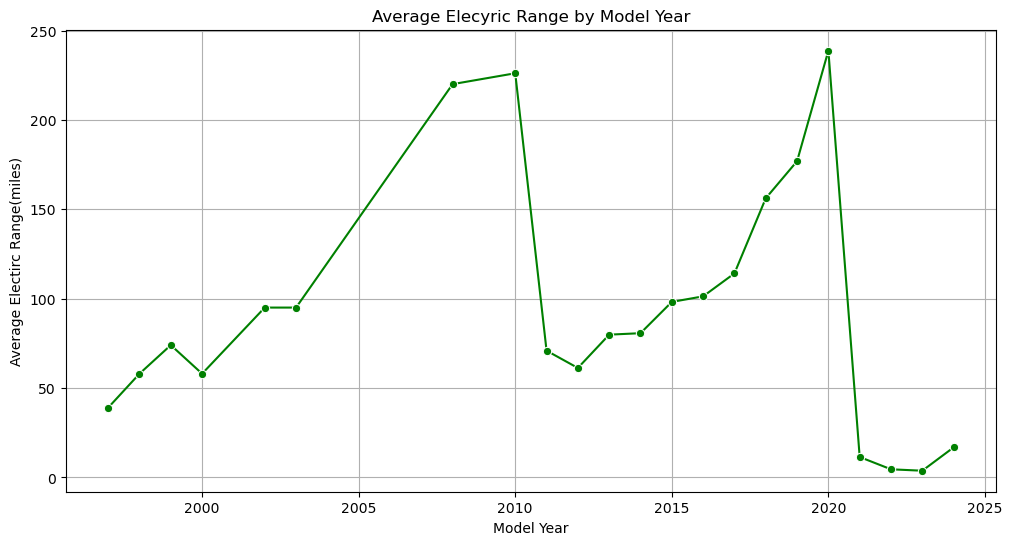

In [61]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data=average_range_by_year,marker='o',color='green')
plt.title('Average Elecyric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electirc Range(miles)')
plt.grid(True)
plt.show()

In [5]:
average_range_by_model=top_makes_data.groupby(['Make','Model'],['Electric Range'].mean().sort_values(ascending=False).reset_index())
top_range_models=average_range_by_model.head(10)
plt.figure(figsize=(12,8))
barplot=sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_models,palette="cool")
plt.title('Too 10 Models by Average Elecyric Range in Top Makes')
plt.xlabel('Average Electirc Range(miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.show()


NameError: name 'top_makes_data' is not defined

In [70]:
ev_registration_counts=ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

In [71]:
 pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [78]:
from scipy.optimize import curve_fit
filtered_years=ev_registration_counts[ev_registration_counts.index<=2023]
def exp_growth(x,a,b):
    return a*np.exp(b*x)
x_data = filterd_years.index-filtered_years.index.min()
y_data=filterd_years.values
params,covariance=curve_fit(exp_growth,x_data,y_data)
forecast_years=np.arange(2024,2024+6)-filterd_years.index.min()
forecasted_values=exp_growth(forecast_years,*params)
forecasted_evs=dict(zip(forecast_years+filtered_years.index.min(),forecasted_values))
print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


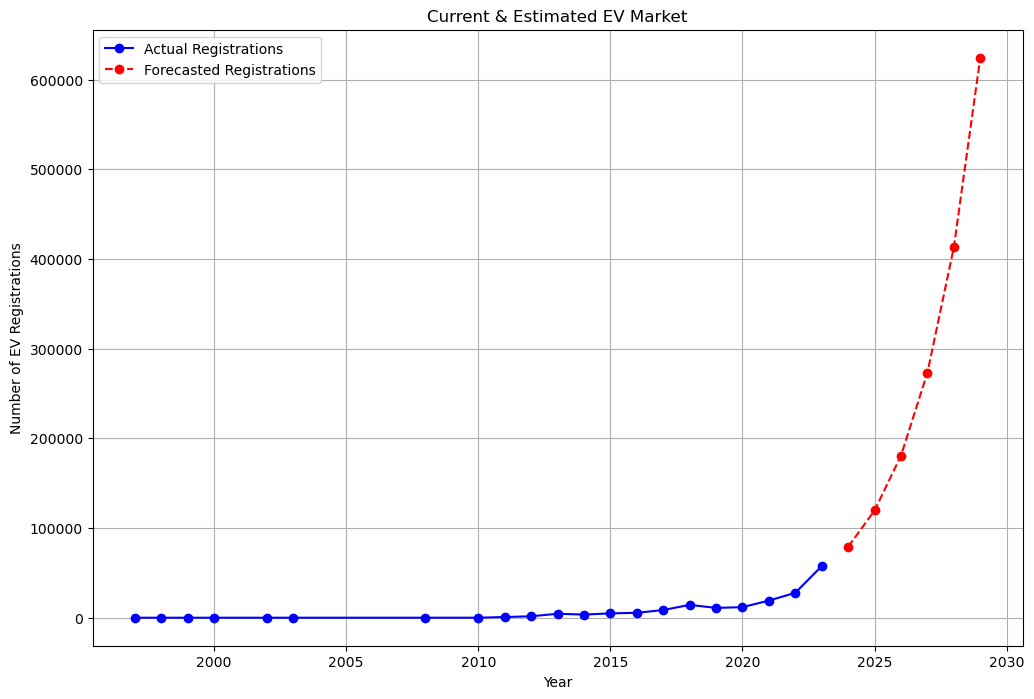

In [80]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index

forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()